***Importing necessary libraries for data manipulation and visualization***

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import time

#  Question 1: Basic Quicksort

##### Write a Python function to implement the basic Quicksort algorithm. 
* Include partitioning (**pivot** to be always in the **middle** of array) and recursive calls
* Define new _left_, _middle_, and _right_ arrays
* Test your function using *[5, 2, 8, 6, 0, 7, 1, 4, 9, 3]*

<img src=attachment:5c8f5152-049b-4de9-9404-254ca4b89d1c.png width="500">
<img src=attachment:b7c45991-0335-4294-9bf8-be7602d24285.png width="500">
v>
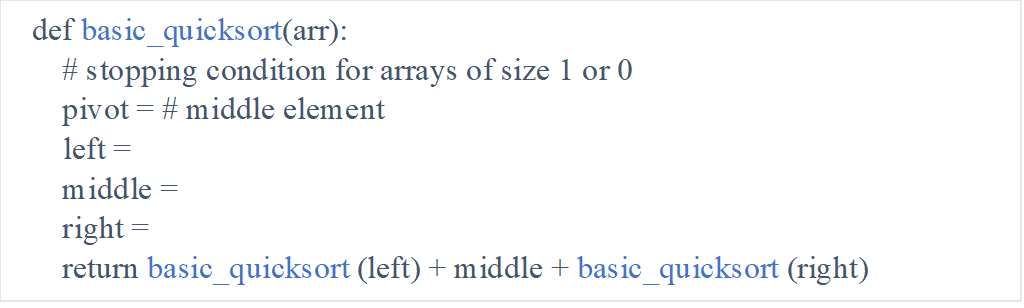
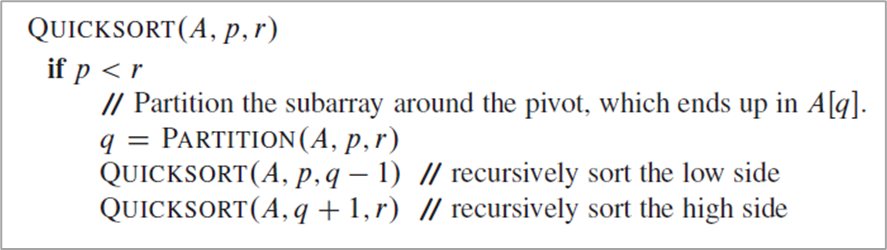

In [2]:
def basic_quicksort(arr):
    # stopping condition for arrays of size 1 or 0
    if len(arr) <= 1:                  
        return arr
    pivot = arr[len(arr) // 2]
    #print('pivot:', pivot)
    left = [x for x in arr if x < pivot]
    #print('left:', left)
    middle = [x for x in arr if x == pivot]
    #print('middle:', middle)
    right = [x for x in arr if x > pivot]
    #print('right:', right)
    #print('new recursion -------')
    return basic_quicksort(left) + middle + basic_quicksort(right)

# Test basic quicksort function
arr = [5, 2, 8, 6, 0, 7, 1, 4, 9, 3] 

sorted_arr = basic_quicksort(arr)
print("Sorted Array:", sorted_arr) 

Sorted Array: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Question 2: Partitioning

#### Implement the partitioning operation for the Quicksort algorithm. 

* Write a function that takes an *array*, a *starting index*, and an *ending index*, and rearranges the array elements around the pivot.
* 	Test your partitioning function using [5, 2, 8, 6, 0, 7, 1, 4, 9, 3]<img src=attachment:321ea27f-2267-41d3-aeb3-82059266fb65.png width="500">


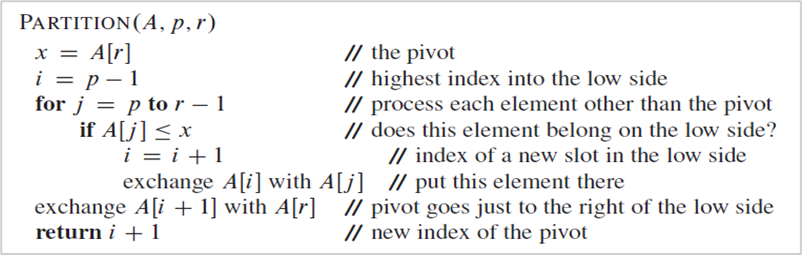

In [3]:
def partition(arr, start, end):
    pivot = arr[end]
    i = start - 1
    for j in range(start, end):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[end] = arr[end], arr[i + 1]
    return i + 1

# Test partition function
arr = [5, 2, 8, 6, 0, 7, 1, 4, 9, 3] 
print('Array before partition:', arr)  
index = partition(arr, 0, len(arr)-1)
print('Array after partition: ', arr)  

Array before partition: [5, 2, 8, 6, 0, 7, 1, 4, 9, 3]
Array after partition:  [2, 0, 1, 3, 5, 7, 8, 4, 9, 6]


In [4]:
print(len(range(0, 10)))

10


# Question 3: Quicksort with Partitioning

#### Implement the Quicksort algorithm using the partition function of question 2.

* Test your Quicksort function using [5, 2, 8, 6, 0, 7, 1, 4, 9, 3]

<img src=attachment:3fee9019-23fc-44a1-94e6-d4368f4e6145.png width="500">.

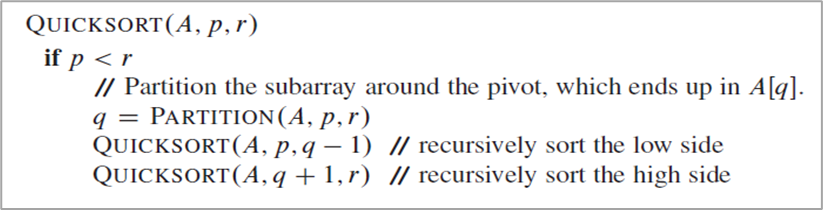

In [32]:
def quicksort(arr, start, end):
    if start < end:
        pivot_index = partition(arr, start, end)
        quicksort(arr, start, pivot_index - 1)
        quicksort(arr, pivot_index + 1, end)      

# Test quicksort function
arr = [5, 2, 8, 6, 0, 7, 1, 4, 9, 3] 
quicksort(arr, 0, len(arr)-1)
print("Sorted Array:", arr) 

Sorted Array: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Question 4: Randomized Quicksort

* Implement the **randomized version of Quicksort** using *randomized partitioning* technique.
* 	Compare the performance of the randomized quicksort with original implementation of quicksort that select last element as pivot
* •	Test this comparison on various random arrays

<img src=attachment:75ec6f28-49fe-406d-a2e5-0dbd6b61e938.png width="500">.

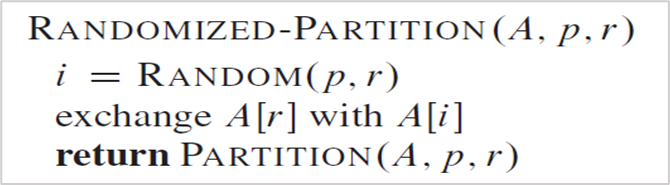

In [43]:
def random_partition(arr, start, end):
    pivot_index = random.randint(start, end)
    arr[pivot_index], arr[end] = arr[end], arr[pivot_index]
    return partition(arr, start, end)

# Test random_partition function
arr = [5, 2, 8, 6, 0, 7, 1, 4, 9, 3] 
random_partition(arr, 0, len(arr) - 1)
print("Array after Random partition:", arr) 

Array after Random partition: [5, 2, 3, 0, 1, 4, 6, 7, 9, 8]


In [44]:
def random_quicksort(arr, start, end):
    if start < end:
        pivot_index = random_partition(arr, start, end)
        random_quicksort(arr, start, pivot_index - 1)
        random_quicksort(arr, pivot_index + 1, end)  

# Test random_partition function
arr = [5, 2, 8, 6, 0, 7, 1, 4, 9, 3] 
random_quicksort(arr, 0, len(arr)-1)
print("Sorted Array:", arr) 

Sorted Array: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [47]:
import sys
sys.setrecursionlimit(2000)  # Increase recursion limit to 2000 or any number higher than the default 1000

arr1 = [random.randint(0, 100000) for _ in range(100000)]
arr2 = [random.randint(0, 1000000) for _ in range(1000000)]

print('#Quicksort:')
start_time = time.time()
quicksort(arr1, 0, len(arr1)-1)
print('Elapsed time for array of size ', len(arr1),' using Quicksort: ', time.time() - start_time, 'sec')

start_time = time.time()
quicksort(arr2, 0, len(arr2)-1)
print('Elapsed time for array of size ', len(arr2),' using Quicksort: ', time.time() - start_time, 'sec')

print('#Randomized_Quicksort:')
start_time = time.time()
random_quicksort(arr1, 0, len(arr1)-1)
print('Elapsed time for array of size ', len(arr1),' using Randomized Quicksort: ', time.time() - start_time, 'sec')

start_time = time.time()
random_quicksort(arr2, 0, len(arr2)-1)
print('Elapsed time for array of size ', len(arr2),' using Randomized Quicksort: ', time.time() - start_time, 'sec')

#Quicksort:
Elapsed time for array of size  100000  using Quicksort:  0.3560974597930908 sec
Elapsed time for array of size  1000000  using Quicksort:  5.817614316940308 sec
#Randomized_Quicksort:
Elapsed time for array of size  100000  using Randomized Quicksort:  0.8861725330352783 sec
Elapsed time for array of size  1000000  using Randomized Quicksort:  12.741182088851929 sec


# Question 4: Randomized Quicksort* Implement randomized version of Quicksort to sort values in an array in **descending order**.
* Test your implementation using [5, 2, 8, 6, 0, 7, 1, 4, 9, 3]e.

In [48]:
def partition_descend(arr, start, end):
    pivot = arr[end]
    i = start - 1
    for j in range(start, end):
        if arr[j] >= pivot:      # Change here to descending order
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[end] = arr[end], arr[i + 1]
    return i + 1

def random_partition_descend(arr, start, end):
    pivot_index = random.randint(start, end)
    arr[pivot_index], arr[end] = arr[end], arr[pivot_index]
    return partition_descend(arr, start, end)

def random_quicksort_descend(arr, start, end):
    if start < end:
        pivot_index = random_partition_descend(arr, start, end)
        random_quicksort_descend(arr, start, pivot_index - 1)
        random_quicksort_descend(arr, pivot_index + 1, end)  


# Test implementation:
arr = [5, 2, 8, 6, 0, 7, 1, 4, 9, 3] 
random_quicksort_descend(arr, 0, len(arr)-1)
print("Sorted Array:", arr) 

Sorted Array: [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


# Additional Question: Comparison with Other Sorting Algorithms

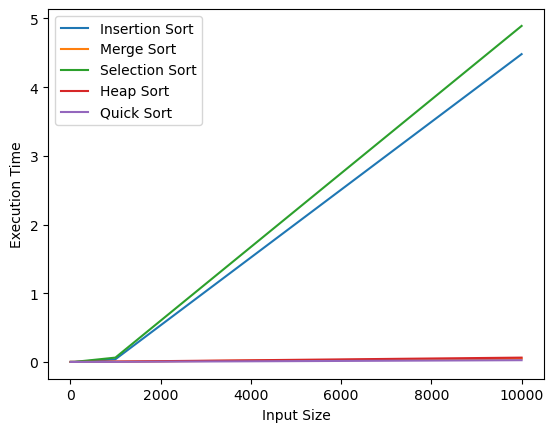

In [51]:
# Compare execution time
sizes = [10, 100, 1000, 10000]
insertion_times = []
merge_times = []
selection_times = []
heap_times = []
quick_times = []
# - - - - - - - - - - - - - - - - - - - - - - - - - 
def insertion_sort(arr):  # Ascending
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1

        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1

        arr[j + 1] = key
# - - - - - - - - - - - - - - - - - - - - - - - - - 
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]
        # print(left_half)

        merge_sort(left_half)    # recursively sort
        merge_sort(right_half)   # recursively sort
        

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
# - - - - - - - - - - - - - - - - - - - - - - - - - 
def selection_sort(arr):
    n = len(arr)
    
    for i in range(n):
        min_index = i
        
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        
        # Swap the minimum element with the first element in the unsorted part
        arr[i], arr[min_index] = arr[min_index], arr[i]
# - - - - - - - - - - - - - - - - - - - - - - - - - 
def heapify(arr, n, i):
    largest = i
    left_child = 2 * i + 1
    right_child = 2 * i + 2
    
    if left_child < n and arr[left_child] > arr[largest]:
        largest = left_child
    if right_child < n and arr[right_child] > arr[largest]:
        largest = right_child
        
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)
        
def build_max_heap(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
        
def heapsort(arr):
    n = len(arr)
    build_max_heap(arr)
    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        heapify(arr, i, 0)
# - - - - - - - - - - - - - - - - - - - - - - - - -        
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quicksort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quicksort(arr, low, pivot_index - 1)
        quicksort(arr, pivot_index + 1, high) 
# - - - - - - - - - - - - - - - - - - - - - - - - -        


        
for size in sizes:
    arr_insertion = [random.randint(0, 10000) for _ in range(size)]
    arr_merge = arr_insertion.copy()
    arr_selection = arr_insertion.copy()
    arr_heap = arr_insertion.copy()
    arr_quick = arr_insertion.copy()

    start_time = time.time()
    insertion_sort(arr_insertion)
    insertion_times.append(time.time() - start_time)

    start_time = time.time()
    merge_sort(arr_merge)
    merge_times.append(time.time() - start_time)
    
    start_time = time.time()
    selection_sort(arr_selection)
    selection_times.append(time.time() - start_time)
    
    start_time = time.time()
    heapsort(arr_heap)
    heap_times.append(time.time() - start_time)
    
    start_time = time.time()
    quicksort(arr_quick, 0, len(arr_quick)-1)
    quick_times.append(time.time() - start_time)

plt.plot(sizes, insertion_times, label='Insertion Sort')
plt.plot(sizes, merge_times, label='Merge Sort')
plt.plot(sizes, selection_times, label='Selection Sort')
plt.plot(sizes, heap_times, label='Heap Sort')
plt.plot(sizes, quick_times, label='Quick Sort')
plt.xlabel('Input Size')
plt.ylabel('Execution Time')
plt.legend()
plt.show()